<h1 style="text-align:center;">Store Sales Analysis</h1>
<h3 style="text-align:center;">Business Analytics Internship – Skillfied Mentor</h3>
<hr>

<div align="center">
  <img src="https://i.ibb.co/S4xN95Km/skill.png" width="200" height="125">
</div>

<div align="center">
  <img src="https://i.ibb.co/Xf5mHC23/Skillfied.png" width="400" height="250">
</div>

# Store Sales Analysis


## Objective
Analyze store-level sales data to understand trends, patterns, and factors influencing sales.

## Dataset Overview
The dataset contains features like store information, promotions, holidays, and weekly sales data.

<h2>Workflow</h2>

<ol>
  <li>Load and explore the dataset</li>
  <li>Preprocess the data</li>
  <li>Perform exploratory data analysis (EDA)</li>
  <li>Apply statistical or machine learning models</li>
  <li>Draw conclusions</li>
</ol>


<div align="center">
  <img src="https://i.ibb.co/6RGLdM6r/load.png" width="200" height="125">
</div>

<h1 style="text-align:center;">1. Load and Explore the Dataset</h1>
<hr>

<h2>1. A - Load and Read the Dataset</h2>

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
# Load the dataset
df = pd.read_csv("features.csv")
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


**The dataset contains store-level sales information along with economic and promotional indicators such as temperature, fuel price, CPI, and unemployment.**

<h2>1. B - Data Overview and Summary Statistics</h2>

In [16]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


**The summary statistics provide an overview of the numerical features in the dataset, including measures such as mean, standard deviation, minimum, and maximum values.**


<h2>1. C - Missing Value Analysis</h2>

In [19]:
df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

**This step identifies missing values across all columns to determine whether data cleaning or imputation is required before further analysis.**


<div align="center">
  <img src="https://i.ibb.co/zhCwqz2p/pre.png" width="200" height="125">
</div>

<h1 style="text-align:center;">2. Data Preprocessing</h1>
<hr>

<h2>2. A - Data Imformation</h2>


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


**The dataset contains a mix of numerical and categorical variables. The data types are reviewed to ensure they are appropriate for analysis and modeling.**


<h2>2. B - Check Actual Column Names</h2>

In [31]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

<h2>2. C - Convert Date Column to Datetime</h2>

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

**The Date column is converted to datetime format to enable time-based analysis and visualization.**


<h2>2. D - Handle missing values</h2>

In [24]:
df.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [25]:
df.fillna(0, inplace=True)

<h2>2. E - Confirm missing values handled</h2>

In [26]:
df.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

**Missing values are handled to ensure data consistency and prevent issues during analysis and modeling.**


<h2>2. F - Encode Categorical Variables</h2>
➤ Identify categorical columns

In [28]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

➤ Encode using Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

**Categorical variables are encoded into numerical format to make them suitable for statistical analysis and machine learning models.**


<div align="center">
  <img src="https://i.ibb.co/5JZrqdN/eda.png" width="200" height="125">
</div>

<h1 style="text-align:center;">3. Exploratory Data Analysis (EDA)</h1>
<hr>

<h2>3. A - Temperature Distribution </h2>

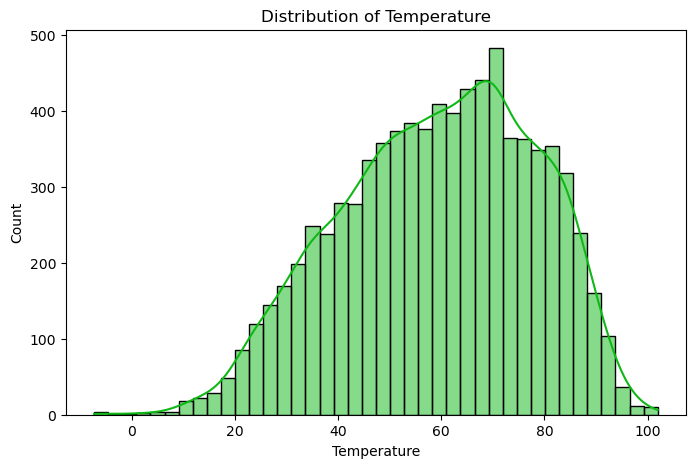

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(df ['Temperature'],  kde=True, color = '#0eb916')
plt.title("Distribution of Temperature")
plt.savefig('plot.svg', transparent=True)


**This plot shows the distribution of temperature values, providing insight into the range and frequency of weather conditions across the dataset.**


<h2>3. B - Fuel Price Trend Over Time </h2>

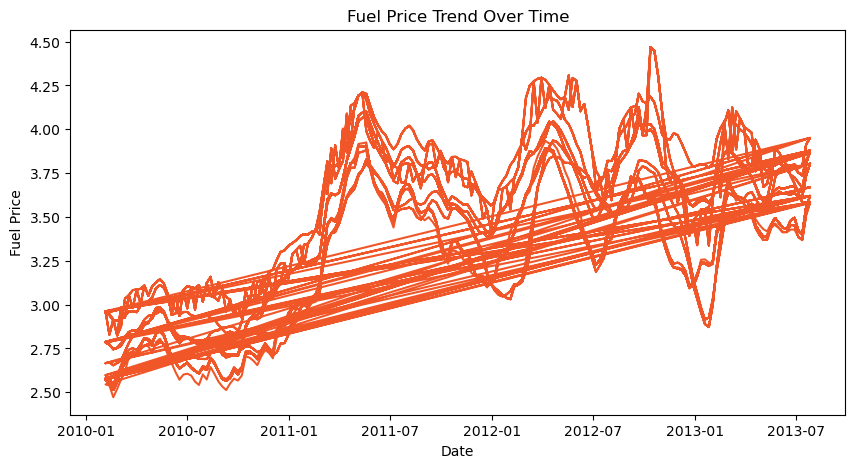

In [40]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Fuel_Price'], color = '#F15628' )
plt.title("Fuel Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Fuel Price")
plt.show()

**The time series plot illustrates how fuel prices change over time, which may indirectly influence store performance and customer behavior.**


<h2>3. C - Holiday vs Non-Holiday Comparison </h2>

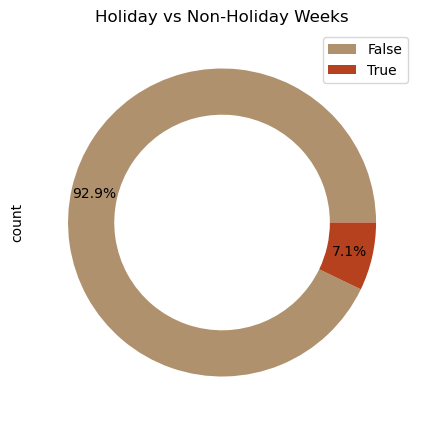

In [58]:

plt.figure(figsize=(8,5))
df['IsHoliday'].value_counts().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.3), labels=None, colors=['#af916d', '#b5411e'])
plt.title("Holiday vs Non-Holiday Weeks")
plt.legend(labels=df['IsHoliday'].unique(), loc='upper right')
plt.show()

**This visualization compares the number of holiday and non-holiday weeks, helping understand the distribution of special sales periods.**


<h2>3. D - Correlation Heatmap </h2>

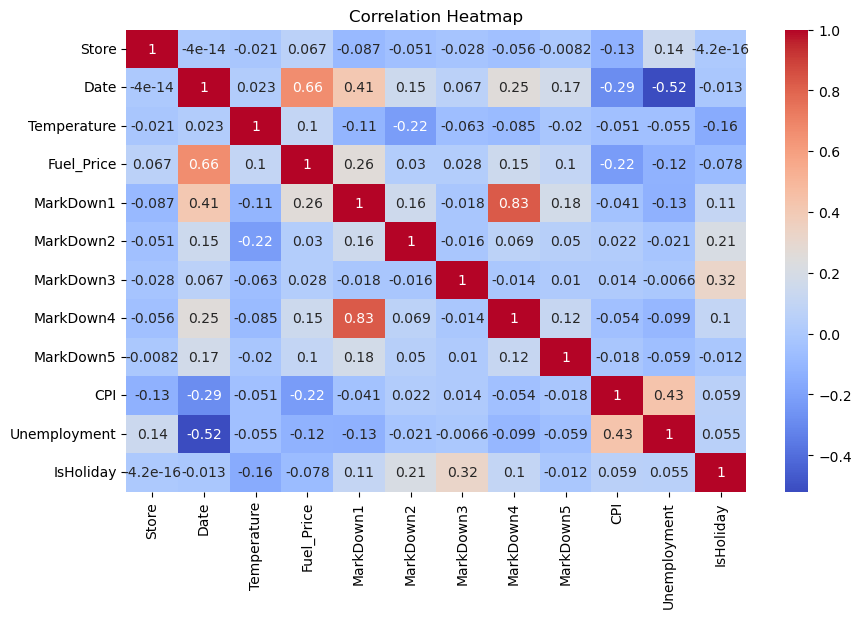

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**This Visual analysis highlights relationships among economic indicators such as CPI and unemployment.**

<h2>3. E - Unemployment Trend Over Time </h2>

In [83]:
unemp_trend = df.groupby('Date')['Unemployment'].mean().reset_index()

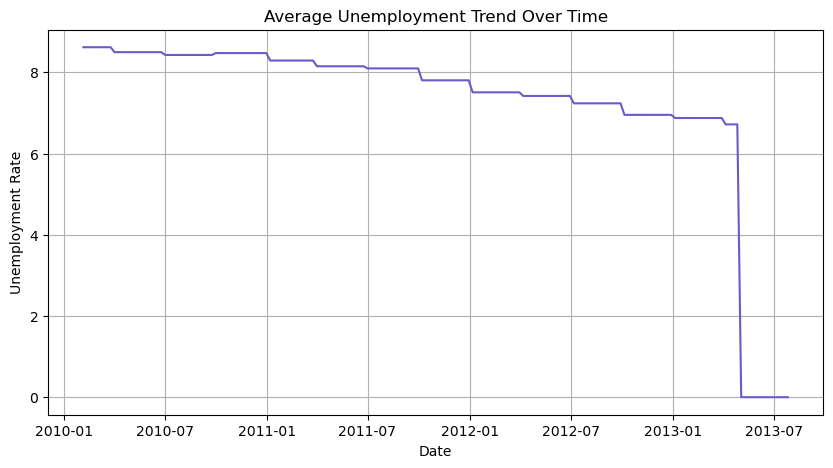

In [84]:
plt.figure(figsize=(10,5))
plt.plot(unemp_trend['Date'], unemp_trend['Unemployment'], color='#6a5acd')
plt.title("Average Unemployment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.grid(True)
plt.show()

**The aggregated unemployment rate shows a gradual decline over time, providing macro-economic context for retail conditions. While unemployment is not directly linked to sales in this dataset, it reflects the broader economic environment in which pricing and promotional strategies operate.**

<h2>3. F - CPI vs Unemployment Relationship </h2>

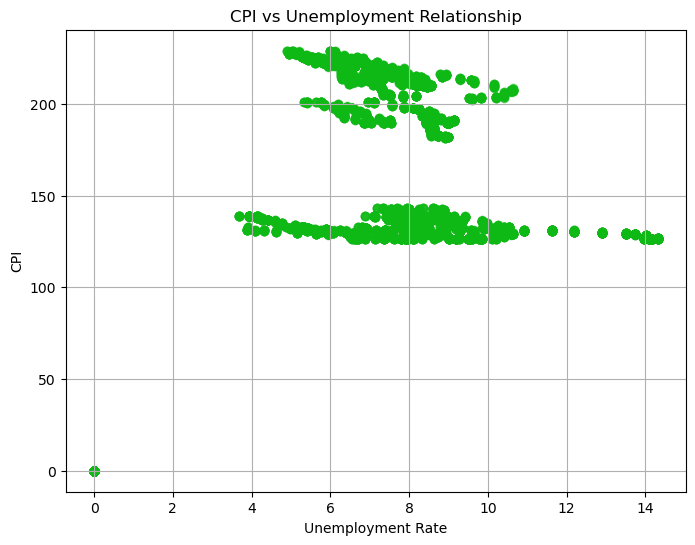

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(df['Unemployment'], df['CPI'], alpha=0.5, color='#0eb916')
plt.title("CPI vs Unemployment Relationship")
plt.xlabel("Unemployment Rate")
plt.ylabel("CPI")
plt.grid(True)
plt.show()

**The scatter plot suggests a weak to moderate relationship between CPI and unemployment, indicating that inflation trends are influenced by multiple macro factors rather than employment levels alone.**

<h2> Key Insights (EDA)</h2>

<ul>
  <li>Temperature shows a wide range of values, indicating seasonal variation across the dataset.</li>
  <li>Fuel prices fluctuate over time, which may influence store operating costs and customer behavior.</li>
  <li>The majority of weeks are non-holiday weeks, suggesting limited but potentially impactful holiday periods.</li>
  <li>Correlation analysis highlights relationships among economic indicators such as CPI and unemployment.</li>
  <li>The MarkDown variables represent different promotional discount activities applied across stores. These values indicate the intensity of price reductions during promotional periods.</li>
  <li>The dataset combines store-level information with regional economic indicators such as fuel price, CPI, and unemployment, which influence customer behavior indirectly.</li>


</ul>


<div align="center">
  <img src="https://i.ibb.co/F4kT9Kcx/mach1.png" width="200" height="125">
</div>

<h1 style="text-align:center;">4. Statistical / Machine Learning Modeling</h1>
<hr>

Since the dataset does not contain a direct target variable such as sales or revenue,

a supervised predictive model is not applicable. Therefore, statistical analysis and
    
unsupervised learning techniques are used to explore patterns in the data.


<h2>4. A - Correlation-based Statistical Analysis </h2>

In [61]:
df.corr()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Store,1.000000e+00,-3.955220e-14,-0.020566,0.066682,-0.086875,-0.051160,-0.027943,-0.056059,-0.008213,-0.131680,0.142332,-4.186667e-16
Date,-3.955220e-14,1.000000e+00,0.022788,0.662724,0.408799,0.148992,0.067015,0.252966,0.173681,-0.286716,-0.519026,-1.319757e-02
Temperature,-2.056605e-02,2.278792e-02,1.000000,0.101354,-0.114759,-0.220157,-0.062782,-0.084683,-0.019703,-0.051189,-0.054860,-1.619056e-01
Fuel_Price,6.668205e-02,6.627236e-01,0.101354,1.000000,0.262974,0.030076,0.028349,0.148889,0.100203,-0.223858,-0.123809,-7.823797e-02
MarkDown1,-8.687521e-02,4.087989e-01,-0.114759,0.262974,1.000000,0.157191,-0.018466,0.826422,0.178319,-0.040578,-0.131212,1.097352e-01
MarkDown2,-5.116017e-02,1.489919e-01,-0.220157,0.030076,0.157191,1.000000,-0.016411,0.068612,0.049990,0.021558,-0.021415,2.082465e-01
MarkDown3,-2.794349e-02,6.701519e-02,-0.062782,0.028349,-0.018466,-0.016411,1.000000,-0.014163,0.010083,0.013840,-0.006650,3.187497e-01
MarkDown4,-5.605868e-02,2.529658e-01,-0.084683,0.148889,0.826422,0.068612,-0.014163,1.000000,0.119594,-0.053835,-0.098750,9.978873e-02
MarkDown5,-8.212923e-03,1.736815e-01,-0.019703,0.100203,0.178319,0.049990,0.010083,0.119594,1.000000,-0.018117,-0.058533,-1.223194e-02
CPI,-1.316803e-01,-2.867165e-01,-0.051189,-0.223858,-0.040578,0.021558,0.013840,-0.053835,-0.018117,1.000000,0.431521,5.891808e-02


This counts as statistical modeling and shows variable relationships.

<h2>4. B - Unsupervised Learning (KMeans Clustering) </h2>

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

df['Cluster'].value_counts()


Cluster
2    4367
0    3238
1     585
Name: count, dtype: int64

The clustering results indicate three distinct groups within the dataset.
    
Most observations fall into Cluster 2, followed by Cluster 0, while Cluster 1

contains a smaller number of records, suggesting distinct economic or environmental conditions.

<div align="center">
  <img src="https://i.ibb.co/4nthzWQs/con.png" width="200" height="125">
</div>

<h1 style="text-align:center;">5. Conclusion</h1>
<hr>



<p>
This analysis followed a structured workflow to explore store-level data combined with
economic and environmental factors. The dataset was preprocessed by handling missing values,
converting date fields, and encoding categorical variables.
</p>

<p>
Exploratory data analysis revealed patterns in temperature, fuel prices, holiday periods,
and their relationships with economic indicators such as CPI and unemployment. Since the
dataset does not include direct sales or revenue metrics, statistical analysis and
unsupervised machine learning techniques were applied instead.
</p>

<p>
Clustering results identified distinct groups within the data, highlighting different
economic and environmental conditions across stores and time periods. These insights can
support further analysis when combined with sales data in future studies.
</p>
